In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
matplotlib.style.use('ggplot')
%matplotlib inline
# df = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/EastAfrican_index.csv')

In [2]:
df = pd.read_csv('C:/Users/miki/Desktop/VSML/cluster-machine-learning/data/raw/data.csv')
df

,Districts,water_prc,elect_prc,tel_prc
0,Haramaya,4.98,6.49,8.15
1,Qarsa,1.92,3.39,9.67
2,Haramaya,2.23,7.84,8.62
3,Haramaya,4.09,8.09,9.03
4,Haramaya,3.09,6.86,8.19
...,...,...,...,...
4495,Qarsa,1.47,6.22,10.95
4496,Grawa,5.47,4.01,1.80
4497,Grawa,8.48,3.07,0.93
4498,Grawa,5.29,1.52,3.36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Districts  4500 non-null   object 
 1   water_prc  4500 non-null   float64
 2   elect_prc  4500 non-null   float64
 3   tel_prc    4500 non-null   float64
dtypes: float64(3), object(1)
memory usage: 140.8+ KB


In [4]:
df['Districts'].value_counts()

Haramaya    1500
Qarsa       1500
Grawa       1500
Name: Districts, dtype: int64

In [5]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [6]:
water = df['water_prc']
districts = df['Districts']
electric = df['elect_prc']
tele = df['tel_prc']

In [7]:
statistics(water)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
water_prc,3.969093,2.108202,3.93,4.444515


In [8]:
statistics(districts)


,Districts
Haramaya,1500
Qarsa,1500
Grawa,1500


In [9]:
statistics(electric)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
elect_prc,4.867767,1.942839,4.58,3.774625


In [10]:
statistics(tele)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
tel_prc,6.692047,3.53216,8.09,12.476154


In [11]:
def histogram(x):
        """ 
        Function to create the summary statistics histogram plots for 
        our input dataframe and save the results into the figure output
        paths
        Args:
            df(dataframe): input data
            x (int or float): Dataframe features
            outPutPath (str): _description_
        return:
            Histogram plot
        """
        if x.dtype == 'int64' or x.dtype == 'float64':
            sns.displot(x=x, bins = 10, kind='hist',hue_norm=None, kde = True, color=None, col_wrap=None,height=5, aspect=1, facet_kws=None)
            y = plt.ylabel('Frequency', size = 17)
            plt.grid = False
            plt.xticks(size = 17)
            plt.yticks(size = 17)
            plt.title(x.name, size = 19) 
            plt.show()
        else: 
            x = pd.DataFrame(x)
            # Plot       
            sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
            # Customize title
            title = x.columns[0]
            plt.title(title, size=18)
            # Customize ticks and labels
            plt.xticks(size=14)
            plt.yticks(size=14);
            plt.xlabel("")
            plt.ylabel("Counts", size=16, labelpad=15)
            plt.show()

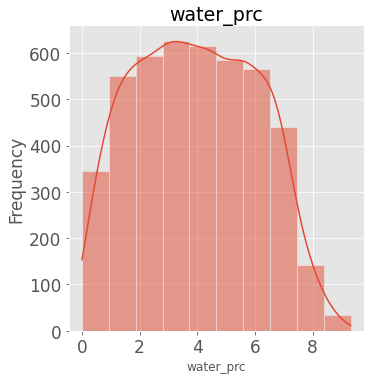

In [12]:
histogram(water)

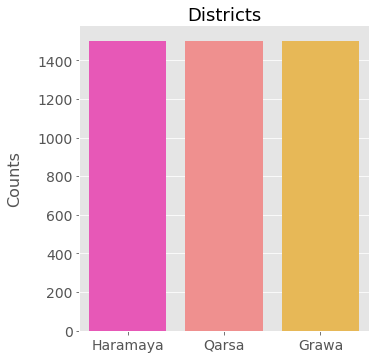

In [13]:
histogram(districts)

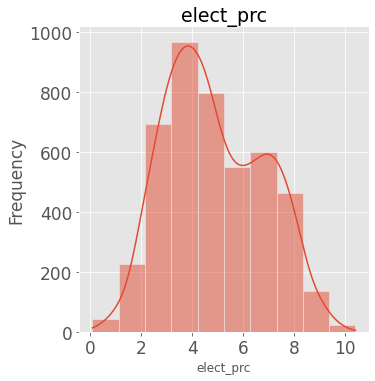

In [14]:
histogram(electric)

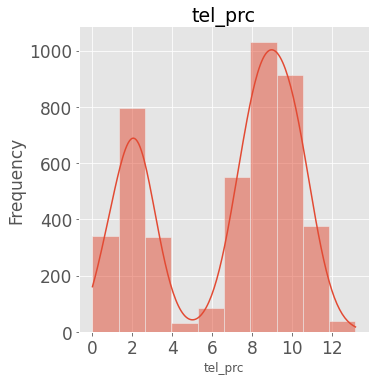

In [15]:
histogram(tele)

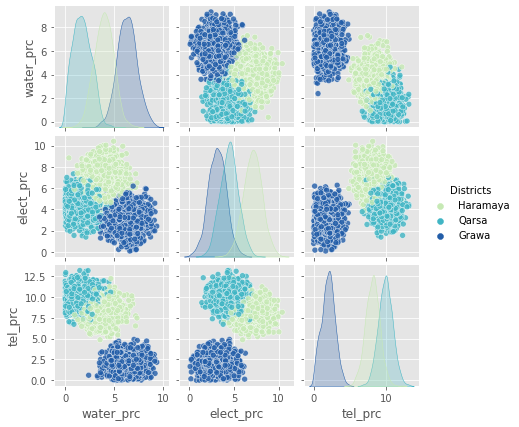

In [16]:
sns.pairplot(df, x_vars = [	'water_prc', 'elect_prc', 'tel_prc'], 
               y_vars = ['water_prc', 'elect_prc', 'tel_prc'], 
               hue = "Districts", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

# Dimensionality Reduction 

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [18]:
# def labelsEncoder(df):
#     """the function to convert the categorical and object type 
#     dataframe features in to numerical type 
#     ===========================================================
#     Arguments: 
#             x: pandas dataframe
#     Return:
#             label encoded dataframe """
#     features = list(df.select_dtypes(include=['category','object']))
#     columns = list(df.select_dtypes(include= ['int64']))
#     le = LabelEncoder()
#     for cols in features:
#         try:
#             df[cols] = le.fit_transform(df[cols])
#         except:
#             print('Error in Encoding!')
#     for cols in columns:
#         try:
#             df[cols] = le.inverse_transform(df[cols])
#         except:
#             print("You can't inverse it")
#     return df      

In [19]:
# labelsEncoder(df)

In [20]:
# df

In [21]:
targetLabel = df['Districts']
scaledFeatures = df.drop(['Districts'], axis = 1)

In [22]:
targetLabel

0       Haramaya
1          Qarsa
2       Haramaya
3       Haramaya
4       Haramaya
          ...   
4495       Qarsa
4496       Grawa
4497       Grawa
4498       Grawa
4499    Haramaya
Name: Districts, Length: 4500, dtype: object

In [23]:
scaledFeatures

,water_prc,elect_prc,tel_prc
0,4.98,6.49,8.15
1,1.92,3.39,9.67
2,2.23,7.84,8.62
3,4.09,8.09,9.03
4,3.09,6.86,8.19
...,...,...,...
4495,1.47,6.22,10.95
4496,5.47,4.01,1.80
4497,8.48,3.07,0.93
4498,5.29,1.52,3.36


In [24]:
le = LabelEncoder()
targetLabel1 = le.fit_transform(targetLabel)

In [25]:
targetLabel1

array([1, 2, 1, ..., 0, 0, 1])

In [26]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledDF = scaler.fit_transform(scaledFeatures)

# Calculating the actual number of clusters for PCA

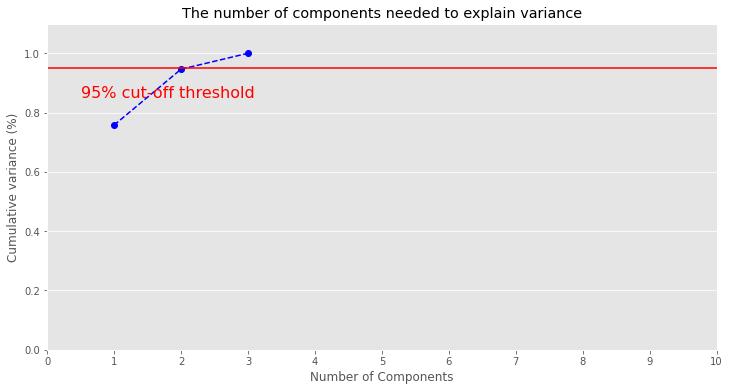

In [27]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA().fit(scaledDF)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 4, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [28]:
pipe = Pipeline([('scaler', MinMaxScaler()), ("pca", PCA(n_components=2, random_state=42)),])

In [29]:
pca = pipe.fit(scaledFeatures)
pca_2d = pca.transform(scaledFeatures)

In [30]:
pcadf = pd.DataFrame(pipe.transform(scaledFeatures), columns=["component_1", "component_2"],)

In [31]:
pcadf["true_label"] = le.inverse_transform(targetLabel1)

In [32]:
pcadf

,component_1,component_2,true_label
0,-0.066227,0.188628,Haramaya
1,-0.256619,-0.227148,Qarsa
2,-0.305056,0.173139,Haramaya
3,-0.218521,0.284091,Haramaya
4,-0.198171,0.129778,Haramaya
...,...,...,...
4495,-0.439404,-0.004183,Qarsa
4496,0.398538,-0.000852,Grawa
4497,0.664797,0.062720,Grawa
4498,0.369696,-0.225391,Grawa


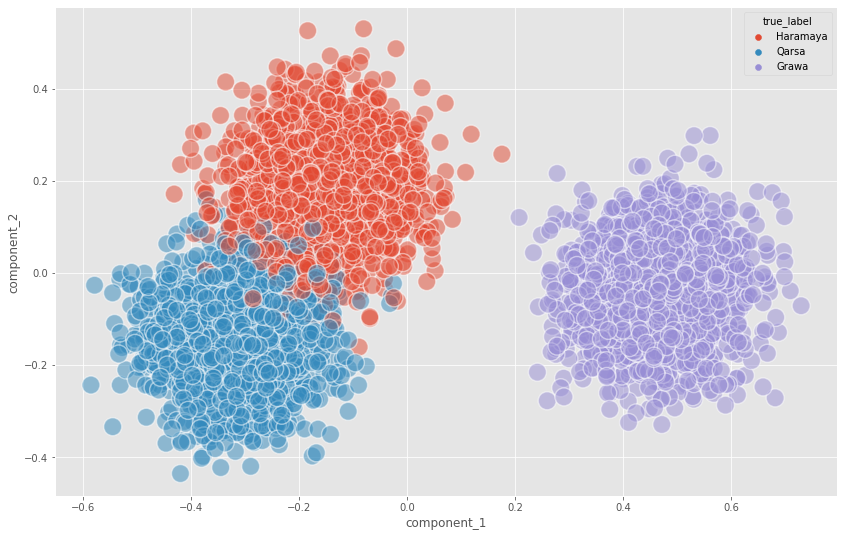

In [33]:
fig = plt.figure(figsize= (14, 9))
ax = fig.add_subplot()
ax = sns.scatterplot(x=pcadf['component_1'], y=pcadf['component_2'], data=pcadf, s=325, alpha=0.5, hue="true_label")
box = ax.get_position()
plt.show()

In [34]:
"""import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()""";

'import plotly.express as px\nfrom sklearn.decomposition import PCA\nfrom sklearn import datasets\nfrom sklearn.preprocessing import StandardScaler\n\ndf = px.data.iris()\nfeatures = [\'sepal_length\', \'sepal_width\', \'petal_length\', \'petal_width\']\nX = df[features]\n\npca = PCA(n_components=2)\ncomponents = pca.fit_transform(X)\n\nloadings = pca.components_.T * np.sqrt(pca.explained_variance_)\n\nfig = px.scatter(components, x=0, y=1, color=df[\'species\'])\n\nfor i, feature in enumerate(features):\n    fig.add_shape(\n        type=\'line\',\n        x0=0, y0=0,\n        x1=loadings[i, 0],\n        y1=loadings[i, 1]\n    )\n    fig.add_annotation(\n        x=loadings[i, 0],\n        y=loadings[i, 1],\n        ax=0, ay=0,\n        xanchor="center",\n        yanchor="bottom",\n        text=feature,\n    )\nfig.show()'

In [ ]:
# loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
# columns = ['water_prc', 'elect_prc', 'tel_prc']
# def biplot():
#     fig = ax.scatter(pca_2d, x = 0, y = 1, color = df['Districts'])
#     for i, cols in enumerate(columns):
#         fig.add_shape(type = 'line', x0 = 0, y0 = 0, x1 = loadings[i, 0], y1 = loadings[i, 1])
#         fig.add_annotation(x = loadings[i, 0], y = loadings[i, 1], ax = 0, ay = 0, xanchor = 'center', yanchor = 'bottom', text = columns)
#     return fig.show()

In [ ]:
"""def fit_ml_cluster(X, model=None, k=None, lst_2Dplot=None, figsize=(10,5)):
    ## model
    if (model is None) and (k is None):
        model = cluster.AffinityPropagation()
        print("--- k not defined: using Affinity Propagation ---")
    elif (model is None) and (k is not None):
        model = cluster.KMeans(n_clusters=k, init='k-means++')
        print("---", "k="+str(k)+": using k-means ---")

    ## clustering
    dtf_X = X.copy()
    dtf_X["cluster"] = model.fit_predict(X)
    k = dtf_X["cluster"].nunique()
    print("--- found", k, "clusters ---")
    print(dtf_X.groupby("cluster")["cluster"].count().sort_values(ascending=False))

    ## find real centroids
    closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, dtf_X.drop("cluster", axis=1).values)
    dtf_X["centroids"] = 0
    for i in closest:
        dtf_X["centroids"].iloc[i] = 1
    
    ## plot
    if (lst_2Dplot is not None) or (X.shape[1] == 2):
        lst_2Dplot = X.columns.tolist() if lst_2Dplot is None else lst_2Dplot
        th_centroids = model.cluster_centers_ if "KMeans" in str(model) else None
        utils_plot_cluster(dtf_X, x1=lst_2Dplot[0], x2=lst_2Dplot[1], th_centroids=th_centroids, figsize=figsize)

    return model, dtf_X
    
    '''
Fit clustering model with K-Means or Affinity Propagation.
:paramater
    :param X: dtf
    :param model: sklearn object
    :param k: num - number of clusters, if None Affinity Propagation is used, else K-Means
    :param lst_2Dplot: list - 2 features to use for a 2D plot, if None it plots only if X is 2D
:return
    model and dtf with clusters
'''"""

In [ ]:
"""'''
Plot clustering in 2D.
:paramater
    :param dtf - dataframe with x1, x2, clusters, centroids
    :param x1: str - column name
    :param x2: str - column name
    :param th_centroids: array - (kmeans) model.cluster_centers_, if None deosn't plot them
'''
def utils_plot_cluster(dtf, x1, x2, th_centroids=None, figsize=(10,5)):
    ## plot points and real centroids
    fig, ax = plt.subplots(figsize=figsize)
    k = dtf["cluster"].nunique()
    sns.scatterplot(x=x1, y=x2, data=dtf, palette=sns.color_palette("bright",k),
                        hue='cluster', size="centroids", size_order=[1,0],
                        legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')

    ## plot theoretical centroids
    if th_centroids is not None:
        ax.scatter(th_centroids[:,dtf.columns.tolist().index(x1)], 
                   th_centroids[:,dtf.columns.tolist().index(x2)], 
                   s=50, c='black', marker="x")"""
                   

In [ ]:
"""'''
Find the best K-Means with the within-cluster sum of squares (Elbow method).
:paramater
    :param X: array
    :param max_k: num or None- max iteration for wcss
    :param plot: bool - if True plots
:return
    k
'''
def find_best_k(X, max_k=10, plot=True):
    ## iterations
    distortions = [] 
    for i in range(1, max_k+1):
        if len(X) >= i:
            model = cluster.KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
            model.fit(X)
            distortions.append(model.inertia_)

    ## best k: the lowest second derivative
    k = [i*100 for i in np.diff(distortions,2)].index(min([i*100 for i in np.diff(distortions,2)]))

    ## plot
    if plot is True:
        fig, ax = plt.subplots()
        ax.plot(range(1, len(distortions)+1), distortions)
        ax.axvline(k, ls='--', color="red", label="k = "+str(k))
        ax.set(title='The Elbow Method', xlabel='Number of clusters', ylabel="Distortion")
        ax.legend()
        ax.grid(True)
        plt.show()
    return k"""

In [ ]:
"""'''
Decomposes the feture matrix of train and test.
:parameter
    :param X_train: array
    :param X_test: array
    :param n_features: num - how many dimensions you want
:return
    dict with new train and test, and the model 
'''
def utils_dimensionality_reduction(X_train, X_test, n_features=2):
    model = decomposition.PCA(n_components=n_features)
    X_train = model.fit_transform(X_train)
    X_test = model.transform(X_test)
    return X_train, X_test, """

In [ ]:
"""'''
Evaluates a model performance.
:parameter
    :param y_test: array
    :param predicted: array
    :param predicted_prob: array
    :param show_thresholds: bool - if True annotates thresholds on the curves
'''
def evaluate_classif_model(y_test, predicted, predicted_prob, show_thresholds=True, figsize=(25,5)):
    classes = np.unique(y_test)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=figsize)
    
    ## Accuray e AUC
    accuracy = metrics.accuracy_score(y_test, predicted)
    auc = metrics.roc_auc_score(y_test, predicted_prob)
    print("Accuracy (overall correct predictions):",  round(accuracy,2))
    print("Auc:", round(auc,2))
    
    ## Precision e Recall
    recall = metrics.recall_score(y_test, predicted)  #= true 1s / all 1s in test (got and missed)
    precision = metrics.precision_score(y_test, predicted)  #= true 1s / all 1s predicted (true 1s + false 1s)
    f1 = metrics.f1_score(y_test, predicted)  #=2 * (precision * recall) / (precision + recall)
    print("Recall (all 1s predicted right):", round(recall,2))  #true positive rate, how many 1s I got
    print("Precision (confidence when predicting a 1):", round(precision,2))  #how many 1s were really 1s
    print("F1 score:", round(f1,2))
    print("Detail:")
    print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in classes]))
       
    ## Plot confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted, labels=classes)
    sns.heatmap(cm, annot=True, annot_kws={"size":15}, fmt='d', ax=ax[0], cmap=plt.cm.Blues, cbar=False)
    ax[0].set(xlabel="Pred", ylabel="True", title="Confusion matrix")
    ax[0].set_yticklabels(labels=classes, rotation=0)
 
    ## Plot roc
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted_prob)    
    ax[1].plot(fpr, tpr, color='darkorange', lw=3, label='area = %0.2f' % metrics.auc(fpr, tpr))
    ax[1].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
    ax[1].hlines(y=recall, xmin=-0.05, xmax=1-cm[0,0]/(cm[0,0]+cm[0,1]), color='red', linestyle='--', alpha=0.7, label="chosen threshold")
    ax[1].vlines(x=1-cm[0,0]/(cm[0,0]+cm[0,1]), ymin=0, ymax=recall, color='red', linestyle='--', alpha=0.7)
    ax[1].set(xlim=[-0.05,1], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver operating characteristic")     
    ax[1].legend(loc="lower right")
    ax[1].grid(True)
    if show_thresholds is True:
        thres_in_plot = []
        for i,t in enumerate(thresholds):
            t = np.round(t,1)
            if t not in thres_in_plot:
                ax[1].annotate(t, xy=(fpr[i],tpr[i]), xytext=(fpr[i],tpr[i]), textcoords='offset points', ha='left', va='bottom')
                thres_in_plot.append(t)
    
    ## Plot precision-recall curve
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, predicted_prob)
    ax[2].plot(recalls, precisions, color='darkorange', lw=3, label='area = %0.2f' % metrics.auc(recalls, precisions))
    ax[2].plot([0,1], [(cm[1,0]+cm[1,0])/len(y_test), (cm[1,0]+cm[1,0])/len(y_test)], linestyle='--', color='navy', lw=3)
    ax[2].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="chosen threshold")
    ax[2].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
    ax[2].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', ylabel="Precision", title="Precision-Recall curve")
    ax[2].legend(loc="lower left")
    ax[2].grid(True)
    if show_thresholds is True:
        thres_in_plot = []
        for i,t in enumerate(thresholds):
            t = np.round(t,1)
            if t not in thres_in_plot:
                ax[2].annotate(np.round(t,1), xy=(recalls[i],precisions[i]), xytext=(recalls[i],precisions[i]), textcoords='offset points', ha='right', va='bottom')
                thres_in_plot.append(t)

    plt.show()"""
     

In [ ]:
"""def data_preprocessing(dtf, y, processNas=None, processCategorical=None, split=None, scale=None, task="classification"):
    try:
        dtf = pop_columns(dtf, [y], "front")
        
        ## missing
        ### check
        print("--- check missing ---")
        if dtf.isna().sum().sum() != 0:
            cols_with_missings = []
            for col in dtf.columns.to_list():
                if dtf[col].isna().sum() != 0:
                    print("WARNING:", col, "-->", dtf[col].isna().sum(), "Nas")
                    cols_with_missings.append(col)
            ### treat
            if processNas is not None:
                print("...treating Nas...")
                cols_with_missings_numeric = []
                for col in cols_with_missings:
                    if dtf[col].dtype == "O":
                        print(col, "categorical --> replacing Nas with label 'missing'")
                        dtf[col] = dtf[col].fillna('missing')
                    else:
                        cols_with_missings_numeric.append(col)
                if len(cols_with_missings_numeric) != 0:
                    print("replacing Nas in the numerical variables:", cols_with_missings_numeric)
                imputer = impute.SimpleImputer(strategy=processNas)
                imputer = imputer.fit(dtf[cols_with_missings_numeric])
                dtf[cols_with_missings_numeric] = imputer.transform(dtf[cols_with_missings_numeric])
        else:
            print("   OK: No missing")
                
        ## categorical data
        ### check
        print("--- check categorical data ---")
        cols_with_categorical = []
        for col in dtf.columns.to_list():
            if dtf[col].dtype == "O":
                print("WARNING:", col, "-->", dtf[col].nunique(), "categories")
                cols_with_categorical.append(col)
        ### treat
        if len(cols_with_categorical) != 0:
            if processCategorical is not None:
                print("...trating categorical...")
                for col in cols_with_categorical:
                    print(col)
                    dtf = pd.concat([dtf, pd.get_dummies(dtf[col], prefix=col)], axis=1).drop([col], axis=1)
        else:
            print("   OK: No categorical")
        
        ## 3.split train/test
        print("--- split train/test ---")
        X = dtf.drop(y, axis=1).values
        Y = dtf[y].values
        if split is not None:
            X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=split, shuffle=False)
            print("X_train shape:", X_train.shape, " | X_test shape:", X_test.shape)
            print("y_train mean:", round(np.mean(y_train),2), " | y_test mean:", round(np.mean(y_test),2))
            print(X_train.shape[1], "features:", dtf.drop(y, axis=1).columns.to_list())
        else:
            print("   OK: step skipped")
            X_train, y_train, X_test, y_test = X, Y, None, None
        
        ## 4.scaling
        print("--- scaling ---")
        if scale is not None:
            scalerX = preprocessing.StandardScaler() if scale == "standard" else preprocessing.MinMaxScaler()
            X_train = scalerX.fit_transform(X_train)
            scalerY = 0
            if X_test is not None:
                X_test = scalerX.transform(X_test)
            if task == "regression":
                scalerY = preprocessing.StandardScaler() if scale == "standard" else preprocessing.MinMaxScaler()
                y_train = scalerY.fit_transform(y_train.reshape(-1,1))
            print("   OK: scaled all features")
        else:
            print("   OK: step skipped")
            scalerX, scalerY = 0, 0
        
        return {"dtf":dtf, "X_names":dtf.drop(y, axis=1).columns.to_list(), 
                "X":(X_train, X_test), "y":(y_train, y_test), "scaler":(scalerX, scalerY)}
    
    except Exception as e:
        print("--- got error ---")
        print(e)

"""

In [ ]:
"""'''
Scales features.
'''
def scaling(dtf, y, scalerX=None, scalerY=None, fitted=False, task="classification"):
    scalerX = preprocessing.MinMaxScaler(feature_range=(0,1)) if scalerX is None else scalerX
    if fitted is False:
        scalerX.fit(dtf.drop(y, axis=1))
    X = scalerX.transform(dtf.drop(y, axis=1))
    dtf_scaled = pd.DataFrame(X, columns=dtf.drop(y, axis=1).columns, index=dtf.index)
    if task == "regression":
        scalerY = preprocessing.MinMaxScaler(feature_range=(0,1)) if scalerY is None else scalerY
        dtf_scaled[y] = scalerY.fit_transform(dtf[y].values.reshape(-1,1)) if fitted is False else dtf[y]
        return dtf_scaled, scalerX, scalerY
    else:
        dtf_scaled[y] = dtf[y]
        return dtf_scaled, scalerX"""



In [ ]:
"""'''
Replace Na with a specific value or mean for numerical and mode for categorical. 
'''
def fill_na(dtf, x, value=None):
    if value is None:
        value = dtf[x].mean() if utils_recognize_type(dtf, x) == "num" else dtf[x].mode().iloc[0]
        print("--- Replacing Nas with:", value, "---")
        dtf[x] = dtf[x].fillna(value)
        return dtf, value
    else:
        print("--- Replacing Nas with:", value, "---")
        dtf[x] = dtf[x].fillna(value)
        return dtf
"""

In [ ]:
"""'''
Transforms a categorical column into dummy columns
:parameter
    :param dtf: dataframe - feature matrix dtf
    :param x: str - column name
    :param dropx: logic - whether the x column should be dropped
:return
    dtf with dummy columns added
'''
def add_dummies(dtf, x, dropx=False):
    dtf_dummy = pd.get_dummies(dtf[x], prefix=x, drop_first=True, dummy_na=False)
    dtf = pd.concat([dtf, dtf_dummy], axis=1)
    print( dtf.filter(like=x, axis=1).head() )
    if dropx == True:
        dtf = dtf.drop(x, axis=1)
    return dtf"""

In [ ]:
"""'''
Split the dataframe into train / test
'''
def dtf_partitioning(dtf, y, test_size=0.3, shuffle=False):
    dtf_train, dtf_test = model_selection.train_test_split(dtf, test_size=test_size, shuffle=shuffle) 
    print("X_train shape:", dtf_train.drop(y, axis=1).shape, "| X_test shape:", dtf_test.drop(y, axis=1).shape)
    print("y_train mean:", round(np.mean(dtf_train[y]),2), "| y_test mean:", round(np.mean(dtf_test[y]),2))
    print(dtf_train.shape[1], "features:", dtf_train.drop(y, axis=1).columns.to_list())
    return dtf_train, dtf_test"""

In [ ]:
"""Project: fake-news-detection   Author: aldengolab   File: run.py    License: MIT License	6 votes	vote downvote up
def pipeline(args):
    '''
    Runs the model loop.
    '''
    df = pd.read_csv(args.filename)
    df.loc[:,args.x_label] = df[args.x_label].fillna("None")
    if args.dedupe:
        df = df.drop_duplicates(subset='content')
    if args.reduce:
        df = restrict_sources(df)
    X = df[args.x_label]
    y = df[args.y_label]
    parser = spacy.load('en')
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    loop = ModelLoop(X_train, X_test, y_train, y_test, args.models,
                     args.iterations, args.output_dir,
                     thresholds = args.thresholds, ks = args.ks,
                     setting=args.features[0])"""

In [ ]:
"""def fetch(self, n_tr, n_val, n_test, seed=0):
        x, y = self.load()
        
        # split data
        x_tr, x_val, y_tr, y_val = train_test_split(
            x, y, train_size=n_tr, test_size=n_val+n_test, random_state=seed)
        x_val, x_test, y_val, y_test = train_test_split(
            x_val, y_val, train_size=n_val, test_size=n_test, random_state=seed+1)
        
        # process x
        if self.normalize:
            scaler = StandardScaler()
            scaler.fit(x_tr)
            x_tr = scaler.transform(x_tr)
            x_val = scaler.transform(x_val)
            x_test = scaler.transform(x_test)
        if self.append_one:
            x_tr = np.c_[x_tr, np.ones(n_tr)]
            x_val = np.c_[x_val, np.ones(n_val)]
            x_test = np.c_[x_test, np.ones(n_test)]
        
        return (x_tr, y_tr), (x_val, y_val), (x_test, y_test)"""

In [ ]:
"""def split_train_test(n_classes):
    from sklearn.datasets import load_digits

    n_labeled = 5
    digits = load_digits(n_class=n_classes)  # consider binary case
    X = digits.data
    y = digits.target
    print(np.shape(X))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    while len(np.unique(y_train[:n_labeled])) < n_classes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33)

    trn_ds = Dataset(X_train, np.concatenate(
        [y_train[:n_labeled], [None] * (len(y_train) - n_labeled)]))
    tst_ds = Dataset(X_test, y_test)

    return trn_ds, tst_ds, digits"""

In [ ]:
"""class KMeans:
    def __init__(self,k):
        self.k = k

    def train(self,X,MAXITER = 100, TOL = 1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in range(MAXITER):
            dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
            for class_ in range(1,self.k):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroidsold) < TOL:
                break
                print('Centroid converged')
        self.centroids = centroids
    
    def predict(self,X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for class_ in range(1,self.k):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes"""